# Fundamentals of Convolutional Neural Networks 1 - Convolution

Welcome to the first notebook on Convolutional Neural Networks. In this notebook, we will start learning about one of the most widely-used neural network classes. In this and the following two notebooks, we will be talking about the fundamental ideas, components, and parameters of Convolutional Neural Networks. Afterwards, we will start talking about some of the most widely used convolutional neural network architectures and we will of course practice. Let's get started.

The diagram below shows the three main components (layers) of most of the CNN architectures: Convolution layers, Pooling layers, and Fully Connected layers. In this notebook, we will focus only on the convolution part and leave pooling and fully connected layers to the next notebook. 

<img src="imgs/image11.png" width="70%">

## Convolution

First of all, let's understand the most basic operation in these neural networks, namely convolution. What is convolution?

Convolution refers to the mathematical operation between two functions $f$ and $g$ in which we slide one function over the other and denote it by $f*g$ expressing the blending of these two functions. It is a widely used operation in differential equations, probability, signal processing, and many other fields. For learning more about this operation, I recommend watching these two videos [But what is a convolution?](https://www.youtube.com/watch?v=KuXjwB4LzSA) and [The Convolution of Two Functions | Definition & Properties](https://www.youtube.com/watch?v=AgKQQtEc9dk).

For our purposes in this notebook, we are more interested in the applications of convolution in image processing. In image processing, convolution is performed between an input image and kernel (a.k.a filter) where we slide the kernel over the entire input image (same as taking the dot product) to apply a processing operation to the image such as blurring, edge detection, or more. 

<img src="imgs/gif8.gif" width="50%">

<a href="https://ai.plainenglish.io/convolutional-neural-networks-simplified-165148207e02"> Source </a>

In the illustration above, we slide a 3x3 kernel over the input (we apply the kernel over each pixel and its neighbors across the entire image), thereby calculating a weighted sum (convolution) in the end. Let's see an example of it, I will apply an edge detection kernel on an image and visualize the result. 

In [2]:
# The code for Convolve2D is taken from https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
from helper import Convolve2D

(-0.5, 644.5, 717.5, -0.5)

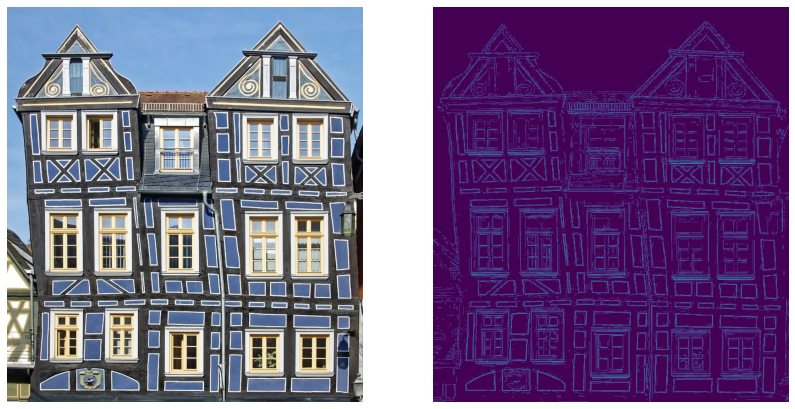

In [3]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = Convolve2D("imagecolv.jpg", kernel)
cv2.imwrite('2DConvolved.jpg', output)

#Let's visualize the images
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,14))

img = plt.imread("imagecolv.jpg")
img_convolved = plt.imread("2DConvolved.jpg")
ax1.imshow(img)
ax1.axis("off")
ax2.imshow(img_convolved)
ax2.axis("off")

### What did we do here?

We took the kernel and slided it over the original image on the left (calculated the dot product at every possible, unique overlap) to use correlations and anti-correlations of adjacent pixels to get the processed version of the image that highlights new information that we are interested (edges). This process is also represented in the below illustration.

<img src="imgs/gif15.gif" width="45%">

<a href="https://medium.com/@timothy_terati/image-convolution-filtering-a54dce7c786b"> Source </a>

We can define this operation mathematically in the following way:

$$\left[W\ * X\right]\left(i,j\right)=\sum _{u=0}^{H-1}\sum _{v=0}^{W-1}\left(w_{u,v}x_{i+u,j+v}\right)$$

where the kernel has the size $H x W$.

Just like we used a kernel for edge detection, one can use other kernels for many different purposes, for instance, we could use a kernel to detect the horizontal or vertical edges separately. Moreover, we can also sharpen or blur the image. Thinking of it this way, a neural network layer that uses kernels to produce new features from images can be very useful for our classification algorithms and improve the generalization performance, and that is actually the basic idea behind convolutional layers.

Also, let's check the shape of both images. 

In [4]:
img.shape

(720, 647, 3)

In [5]:
img_convolved.shape

(718, 645)

As you can see, it is different than the original image. For now, it is sufficient to say that this happened because there were limited number of unique 3x3 patches we could slide the kernel over. We will soon talk about this shrinkage problem in more detail.

## Convolutional Layers

Convolutional layers are composed of neurons that operate like the kernel we just saw. In each layer, multiple kernels with learnable weights (weights are updated during optimization) are used to capture new features and produce feature maps. The term feature map comes from the reason that every dimension in the depth axis is a feature, also height and width axis contain a spatial map of the resulting convolution operation. These feature maps are then propagated to respective layers as illustrated below, one thing to notice is that neurons in the first convolutional layer are not connected to the entire input image but only to pixels in a local region, unlike Fully Connected Layers. This local region of the input image that a neuron is connected to is named as receptive field. Similarly, the following convolutional layers are also only connected to neurons in their respective receptive field. In this sense, the convolutional layers work as a feature detector and we will see how this feature detector can enormously improve MLPs.

<img src="imgs/image10.png" width="40%">

<a href="https://theaisummer.com/receptive-field/"> Source </a>


This architecture of convolutional layers allows them to capture low-level features in the first layer and combine them in the following layers to construct high-level features, hence these networks do a very good job of capturing local patterns. This feature of convolutional layers gives this neural networks class the inductive bias:

1. The patterns they learn are translation-invariant: After learning a certain pattern in the lower-right corner of a picture, a convolutional neural network can recognize it anywhere: for example, in the upper-left corner. A densely connected model would have to learn the pattern a new if it appeared at a new location. This makes convolutional neural networks data-efficient when processing images (because the visual world is fundamentally translation-invariant): they need fewer training samples to learn representations that have generalization power. [Chollet, F. (2021)](https://www.manning.com/books/deep-learning-with-python-second-edition)

<img src="imgs/gif9.gif" width="30%">

<a href="https://samiraabnar.github.io/articles/2020-05/indist"> Source </a>

2. They can learn spatial hierarchies of patterns: A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convolutional neural networks to efficiently learn increasingly complex and abstract visual concepts, because the visual world is fundamentally spatially hierarchical. [Chollet, F. (2021)](https://www.manning.com/books/deep-learning-with-python-second-edition) In other words, the elementary patterns learned in the first layers will be combined into simple objects. For instance, in the case of face detection, simple patterns can be combined into an eye detector in successive layers.

<img src="imgs/gif10.gif" width="50%">

<a href="https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-convolution-neural-networks-e3f054dd5daa"> Source </a>

For more about inductive bias, I recommend reading the following:
1. [Distilling Inductive Biases](https://samiraabnar.github.io/articles/2020-05/indist)
2. [What is translation equivariance, and why do we use convolutions to get it?](https://chriswolfvision.medium.com/what-is-translation-equivariance-and-why-do-we-use-convolutions-to-get-it-6f18139d4c59)

Let's go step-by-step and see what happens in these layers in detail.
<img src="imgs/gif11.gif" width="40%">

<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1"> Source </a>

Assume that the blue blocks represent the input image and each grey block represents a neuron. We want to calculate the following for each neuron:

$$z_i=\sum _{i=1}^k\:w_i\cdot x_{_i}+b,\:and\:a_i=ReLU\left(z_i\right)$$

### What does this equation tell us ?

This equation tells us that for each neuron, we need to multiply the input with the weight and add the bias term then apply the non-linearity (ReLU in this case). Now let's have a look at the illustration above again, to calculate one gray block, we multiply the kernel with uniquely overlapping values in the input image with the spatially limited connectivity, in other words, we are calculating a dot product between a weight matrix (kernel) and an input in neuron's receptive field. Then we can sum all the values in the matrix to get a single value and add the bias term. Afterwards, we can apply the activation function (in this case ReLU) to calculate one grey block (neuron) on the right. Then we move on to calculating outputs for other neurons, at each step we do the calculations using the same weight matrix (kernel) and bias term with respect to the spatially connected local region in the input (with respect to the receptive field). Put it another way, we iterate the kernel and do this operation again and again until we slide the kernel over the entire image and calculated output by also adding the bias term and applying non-linearity. 

So basically, we implemented sliding window operation via neurons: our weight matrix is now called a kernel and shared by every neuron, and since we calculate the dot product between the unique overlapping and input image at each neuron's receptive field separately we still have the same interpretation of sliding the kernel over the entire image but this time we also add the bias term and put it through a non-linearity to get the desired output for the neuron. In the end, all these neurons (3x3) together represent a feature map which is the result of kernel applied to each extracted patch from the input, adding the bias term and fed to non-linearity (ReLU in this example). 

### Why do we need the non-linear activation function?

The convolution operation is a linear operation and we use a non-linear action function so that the model can learn complex structures. For more information, see [Why do we need a non-linear activation function in a convolutional neural network?](https://www.quora.com/Why-do-we-need-a-non-linear-activation-function-in-a-convolutional-neural-network-The-convolution-is-already-non-linear-Shouldnt-that-already-be-enough).

### Convolution on Multiple Channels
On the other hand, so far we only assumed that our inputs are grayscale images, in other words, they have one channel. what would change in multichannel case (RGB images)? 

$$z_i=\sum _{j=1}^c\:\sum_{i=1}^k\:w_{ij}\cdot x_{ij}+b,\:and\:a_i=s\left(z_i\right)$$

If we have multi-channel input, we would use separate kernels for each channel and multiply them with the overlapping input values. In the end, we will be again computing the dot product at each position in the image while sliding each kernel over their respective channels as illustrated below.

<img src="imgs/gif12.gif" width="60%">

<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1"> Source </a>

Then we need to add these three resulting matrices together to get one channel output. We also need to be careful about the terminology, because in multi-channel case filter refers to the collection of seperate kernels we use for each channel.

<img src="imgs/gif13.gif" width="60%">

<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1"> Source </a>


Then we sum all the values in that matrix and add the bias term, so we finally calculate $z_i$. 

<img src="imgs/gif14.gif" width="20%">

<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1"> Source </a>


By using  $z_i$, we can apply the non-linearity and get the output. I recommend watching the following video to see a step-by-step illustration of the process above: [In Depth Explanation | Convolutional Neural Networks | From Scratch](https://www.youtube.com/watch?v=jDe5BAsT2-Y)

Let's see a summary of the steps we went through so far.

<img src="imgs/image12.PNG" width="100%">
<a href="https://www.mdpi.com/2072-4292/13/22/4712"> Source </a>

I previously mentioned that convolutional neural networks use multiple, learnable kernels. To understand this let's go through the illustration below, we have two filters (normally you define the number of filters) which consist of three different kernels for each channel (if we have a grayscale input, we would have one kernel for each filter, so they would be basically the same thing), and each filter outputs one feature map per filter (by using the calculations we just went through above). These filters have learnable weights which will be updated during the backpropagation. The filters in convolutional layers then make it possible for the deep learning model to learn the arrangement of weights that extracts highly correlated details from the images so that the network will learn the weights which minimize the loss function. 

<img src="imgs/image13.png" width="60%">

<a href="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/"> Source </a>

Let's see an example of feature maps and filters. Below you see filters learned in the convolutional layers on the MNIST dataset and the resulting feature maps. In each feature map, every single pixel is calculated by specific neurons (one neuron for each pixel) with shared weights (shared kernel) and bias. Neurons in different feature maps share different parameters so that we make our model capable of capturing multiple features (such as edges) anywhere in its inputs.

<img src="imgs/web2.webp" width="60%">

<a href="https://medium.com/dataseries/visualizing-the-feature-maps-and-filters-by-convolutional-neural-networks-e1462340518e"> Source </a>


We then would propagate these feature maps to the following layers.

Now it is time to do some practice. We will explore some parameters of convolutional neural networks. Let's load the Cifar10 dataset first.

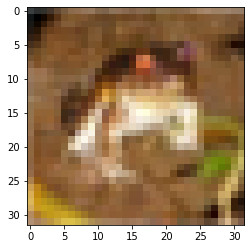

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
sample=x_train[:2,:,:,:]
plt.imshow(sample[0,:,:,:])

Let's rescale the images and show the shape.

In [2]:
images = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1 / 255)(sample)
images.shape # shape of [bath_size, height, width, depth/color_channel]

TensorShape([2, 32, 32, 3])

Let's explore the parameters of `tf.keras.layers.Conv2D()` and then define one with `filter=4` and `kernel_size=3`.
1. **input:** `tf.keras.layers.Conv2D()` expects input of the following shape: [Batch, Height, Width, Channel/Depth].
2. **filter:** We set filter size to 4, which means we will get 4 different feature maps for each image.
3. **kernel_size:** We set the kernel size to 3 which is equal to square kernel of 3x3.

In [3]:
cnn_layer = tf.keras.layers.Conv2D(filters=4, kernel_size=3)
featuremaps = cnn_layer(images)

In [4]:
featuremaps.shape

TensorShape([2, 30, 30, 4])

The depth axis now refers to the number of feature maps. Let's visualize the output.

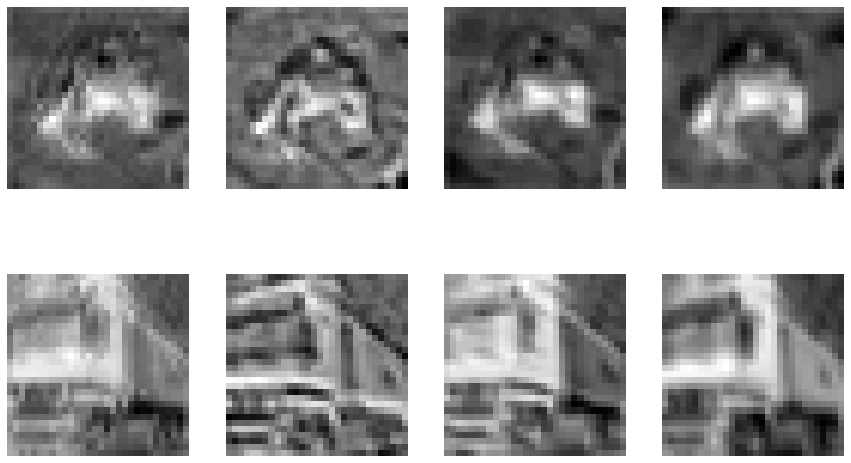

In [5]:
plt.figure(figsize=(15, 9))
for image_idx in range(2):
    for fm_idx in range(4):
        plt.subplot(2, 4, image_idx * 4 + fm_idx + 1)
        plt.imshow(featuremaps[image_idx, :, :, fm_idx], cmap="gray")
        plt.axis("off")
plt.show()

Let's get a bit deeper and see the weights of the layer.

In [6]:
cnn_layer.get_weights()[0].shape # shape of [kernel_height,kernel_weight,input_depth,filter]

(3, 3, 3, 4)

In [7]:
cnn_layer.get_weights()[1].shape # bias term

(4,)

Let's get the weights that we used for the first feature map and then use them with `Convolve2D()` function we previously utilized.

In [8]:
# Careful!! code is taken from https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
from helper import Convolve2D
kernel2 = cnn_layer.get_weights()[0][:,:,:,0].squeeze() 
output = Convolve2D(sample[0], kernel2)  + cnn_layer.get_weights()[1][0] # comment the first two line of Convolve2D()

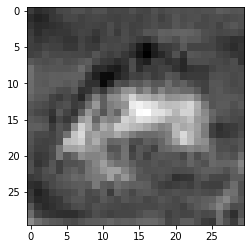

In [9]:
plt.imshow(output,cmap="gray")

Well this looks pretty much like the first feature map. Are they the same?

In [13]:
np.array_equal(output,featuremaps[0,:,:,0]) # No

False

If you look at the two arrays, you will see that the results are quite close and probably the difference is caused by a small difference in our implementation of convolution and `tf.keras.layers.Conv2D()`.

In [14]:
np.array(output)[10]

array([ 0.1748934 ,  0.12793403,  0.11865929,  0.13794158,  0.13516719,
        0.12018311,  0.13609218,  0.0724435 , -0.01069093, -0.00989225,
       -0.13526056, -0.05065624,  0.09264539,  0.07235864,  0.12949261,
        0.1136145 ,  0.15712596,  0.10987131,  0.11245072,  0.18366713,
        0.11363325,  0.14406089,  0.08665718,  0.0554048 ,  0.0444058 ,
        0.10873494,  0.10793675,  0.08594096,  0.06552626,  0.07916946])

In [16]:
np.array(featuremaps[0,:,:,0])[10]

array([ 0.15695998,  0.13572377,  0.13360345,  0.09370442,  0.08285582,
        0.11051358,  0.08426034,  0.07091856,  0.14754668,  0.11416119,
       -0.01702514,  0.19771565,  0.15720588,  0.10054161,  0.15620925,
        0.10056134,  0.10686134,  0.09168247,  0.19758019,  0.20030063,
        0.24105775,  0.17288929,  0.10523911,  0.05544697,  0.03666484,
        0.06138791,  0.07215323,  0.07762036,  0.07862639,  0.07987271],
      dtype=float32)

Let's use the **kernel_initializer** argument of `tf.keras.layers.Conv2D()` with the same weights and see if this time it will produce the same result. 

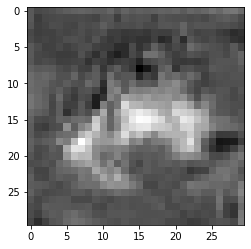

In [17]:
kernel_initializer = tf.keras.initializers.constant(kernel2)
cnn_layer2 = tf.keras.layers.Conv2D(filters=1, kernel_size=3,kernel_initializer=kernel_initializer)
featuremaps2=cnn_layer2(images)
plt.imshow(featuremaps2[0],cmap="gray")

In [18]:
np.array_equal(featuremaps2[0,:,:,0],featuremaps[0,:,:,0]) # This time it returned true :)

True

**kernel_initialize:** This argument works just as the same way that kernel initializer argument of `tf.keras.layers.Dense()` works. By default, it initializes the kernel weights with `glorot_uniform` setting.

`tf.keras.layers.Conv2D()` function is derived from `tf.nn.conv2d()`. Let's also use the same kernel weights with this function.

In [30]:
single_image=np.expand_dims(images[0], axis=0) # I use only one example, so I had to expand the dimension as if we need the batch.
single_image.shape

(1, 32, 32, 3)

In [20]:
single_kernel=np.expand_dims(kernel2, axis=3)
single_kernel.shape

(3, 3, 3, 1)

In [32]:
biases = tf.zeros([1])
output = tf.nn.conv2d(single_image, single_kernel, strides=1, padding="VALID") + biases

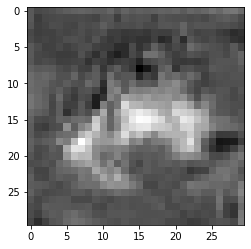

In [33]:
plt.imshow(np.squeeze(output),cmap="gray")

In [34]:
np.array_equal(featuremaps[0,:,:,0],np.squeeze(output)) 

True

So far so good, now let's also explore two other highly important parameters of `tf.keras.layers.Conv2D()`.

## Padding

At the beginning of this notebook, we took an image and slide a kernel over it to show how kernels are used in image processing. As you might recall, the resulting image after we applied the convolution operation was reduced in size (the original image was 720x647 but the output was 718x645). We also suffered the same problem when we used `tf.keras.layers.Conv2D()`. The reason for the size reduction is that our kernel only has a limited number of unique positions where we can place the kernel. Let's see a basic example of it.

<img src="imgs/gif16.gif" width="40%">

<a href="https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html"> Source </a>


In the illustration above we have a 5x5 input image and a 3x3 convolution kernel. The output is 3x3 since there are only 9 unique positions where we can place the convolution kernel (observe that we would not have the same problem if we use a kernel size of one). This causes loss of information in two main ways:

1. Because of the shrinking, we will lose information after every time we perform the convolution. Moreover, we can only apply convolution a limited number of times because the image will get smaller and smaller.
2. Information at the edge is either lost or not strongly captured as the outskirt pixels are only altered only once, whereas pixels in the middle have much more impact as being altered many times by the convolution.

To cope with this problem, we can pad our input image with a border of fake pixels (usually of value 0) so that the spatial dimension of the input will be the same as the feature map and while sliding we can allow the edge pixels to be at kernel's center.

<img src="imgs/gif17.gif" width="60%">

<a href="https://vitalflux.com/convolutional-neural-network-cnn-simply-explained/"> Source </a>

The padding type represented above (value of zero, 1px) is generally referred to as half or same padding since it will keep the spatial dimension of the input the same as the feature map and it has $ p = k/2$ for a kernel of size k. We can also extend the padding size, for instance:

<img src="imgs/gif18.gif" width="30%">

<a href="https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html"> Source </a>

In the illustration above, we have a padding size of 2 which is also referred to as full padding because we can achieve every possible partial or complete overlapping of the kernel on input in this setting. Let's see how to use padding on Tensorflow now.

The first option is to set `padding=valid` which is also the default case and means no padding will be applied to the image.

In [24]:
cnn_layer_valid= tf.keras.layers.Conv2D(filters=4, kernel_size=3,padding="valid")
output = cnn_layer_valid(images)

In [25]:
images.shape

TensorShape([2, 32, 32, 3])

In [26]:
output.shape

TensorShape([2, 30, 30, 4])

As you can see, we have the shrinkage problem again. To solve this we can set `padding = same` which means zeros will be added to the border of the image.

In [27]:
cnn_layer_same = tf.keras.layers.Conv2D(filters=4, kernel_size=3,padding="same")
output = cnn_layer_same(images)

In [28]:
output.shape 

TensorShape([2, 32, 32, 4])

Now we got rid of the shrinkage problem (observe again that the depth axis now contains feature maps). What about full padding? Well, to apply full padding we need to use `keras.layers.ZeroPadding2D()`.

In [29]:
x1=tf.keras.layers.ZeroPadding2D(padding=2)(images)
x2=tf.keras.layers.Conv2D(filters = 4, kernel_size = 3, padding = "valid")(x1)
x2.shape

TensorShape([2, 34, 34, 4])

## Strided Convolution

The stride defines the step size of the kernel while traversing the image. In all the examples above, we assumed the convolution kernel has unit-stride which means we shift the kernel by one pixel in each axis. However, we can change this step size. For example, let's see an illustration where we have a stride of two and non-padding.

<img src="imgs/web3.webp" width="30%">

<a href="https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html"> Source </a>

Mathematically, we can define the strided convolution as the following:

$$\left[W\cdot X\right]\left(i,j\right)=\sum _{u=0}^{H-1}\sum _{v=0}^{W-1}\left(w_{u,v}\:x_{si+u,sj+v}\right)$$

As you can see it is almost the same function that we defined earlier, the only difference is that we now have the step size or strides in the subindices denoted by s.

Increasing stride can be beneficial in several ways:
1. Images contain thousands of pixels, therefore we can reduce the number of computations by increasing the size of the stride as well as we can save time.
2. Increasing step size will also make receptive fields overlap less, however, it will also cause feature maps to have smaller spatial dimensions (downsampling) as can be seen in the illustration above.

We can of course again use padding:

<img src="imgs/gif19.gif" width="30%">

<a href="https://theano-pymc.readthedocs.io/en/latest/tutorial/conv_arithmetic.html"> Source </a>

I recommend seeing the following discussions on stride:

1. [Why do we use max pooling whereas we can use a stride of 2 during a convolution?](https://www.quora.com/Why-do-we-use-max-pooling-whereas-we-can-use-a-stride-of-2-during-a-convolution)
2. [What does stride mean in the context of convolutional neural networks?](https://www.quora.com/What-does-stride-mean-in-the-context-of-convolutional-neural-networks)
3. [Why would one use larger strides in convolutional NNs, as opposed to smaller strides?](https://www.quora.com/Why-would-one-use-larger-strides-in-convolutional-NNs-as-opposed-to-smaller-strides)
5. [Pooling vs. stride for downsampling](https://stats.stackexchange.com/questions/387482/pooling-vs-stride-for-downsampling)
6. [What's the Difference Between Strided Convolution and Pooling?](https://wandb.ai/ayush-thakur/dl-question-bank/reports/What-s-the-Difference-Between-Strided-Convolution-and-Pooling---VmlldzoyMDE5Mjc)
7. [Understanding max-pooling and loss of information](https://stats.stackexchange.com/questions/245365/understanding-max-pooling-and-loss-of-information)

Now let's see how we can use strided convolutions in Tensorflow.

In [75]:
x1=tf.keras.layers.Conv2D(filters = 4, kernel_size = 3, strides=2, padding = "same")(images)
x1.shape

TensorShape([2, 16, 16, 4])

We defined the convolution layer with `strides=2` and `padding=same`. Increasing strides rigorously downsampled the image even though we used same padding.

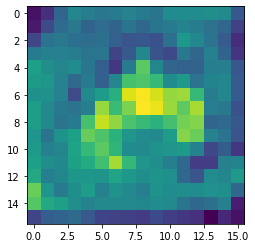

In [76]:
plt.imshow(x1[0,:,:,0])

That's it for the first notebook!

I recommend everyone check out other parameters of [`tf.keras.layers.Conv2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and read this article [Convolutional neural networks](https://www.jeremyjordan.me/convolutional-neural-networks/) before moving on to the second notebook.

## General References

The references below are the main sources I used for preparing the notebooks in this repository. 

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".